<a href="https://colab.research.google.com/github/CecinestpasJonatan/MachineaLearningIntroNotebook/blob/main/MachineLearningIntro_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is machine learning? What is AI? These are question which are commonly discussed amongst academics and will be outside of the scope of this notebook. For practical purposes, machine learning will here be defined as the inferring models from data using numerical methods for the purpose of predicting the behaviour of data not present in the dataset which the model was trained on. AI will be defined as the ability of a system to behave in an intelligent manner.

Practical tips: Each code block can be run by clicking on the play button to the left of each block. All blocks can be run in sequence by clicking CTRL+F9, and as some blocks depends on definitions in the previous blocks this should always be done before rerunnig each block when doing experiments. The language that will be used is Python, the module NumPy will be used for mathematical operations, Matplotlib will be used for plotting, Sklearn and PyTorch will be used for the actual machine learning.

Lets start with an example. Lets say we have aquired measurement data and we want to use this data to generate a model which can predict how the output will change depending on the input data.

Text(0, 0.5, 'Output data')

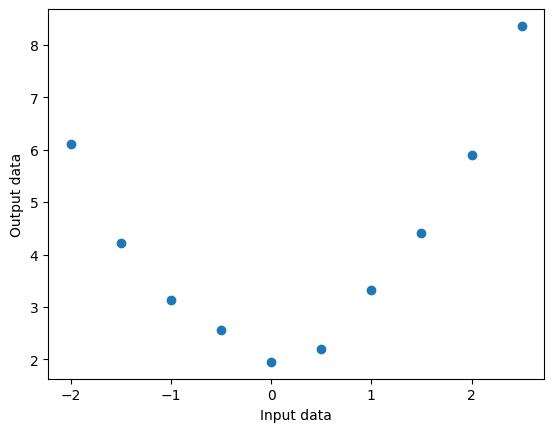

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

#Input data
x = np.linspace(-2, 2.5, 10)
#Output data (DON'T LOOK)
y = x**2 + np.random.randn(10)/5 + 2

plt.scatter(x, y)
plt.xlabel("Input data")
plt.ylabel("Output data")

Even if we don't look at the output function, our intuiton tells us that this data should be generated from some type of quadratic equation, probably with noise interferring with the measurement. Using this knowledge we go back to our first course in linear algebra and apply the least-squared method to fit a curve to our data.

Note: "@" means matrix multiplication, "a**b" means to take a to the power of b.


Text(0, 0.5, 'Output data')

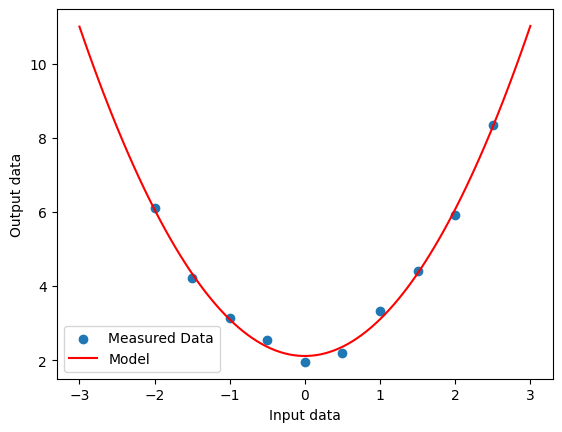

In [2]:
#Ordinary Linear Least squares curve fitting
y_matrix = np.expand_dims(y, axis=-1)
x_matrix = np.repeat(np.expand_dims(x, axis=-1), 3, axis=-1)
x_matrix[:, 0] = 1
x_matrix[:, 2] = x_matrix[:, 2]**2
normal_matrix = x_matrix @ x_matrix.T
normal_matrix_inv = np.linalg.inv(normal_matrix)
b = np.linalg.inv(x_matrix.T@x_matrix)@x_matrix.T@y

x_model = np.linspace(-3, 3, 100)
x_model_matrix = np.repeat(np.expand_dims(x_model, axis=-1), 3, axis=-1)
x_model_matrix[:, 0] = 1
x_model_matrix[:, 2] = x_model_matrix[:, 2]**2
y_model = x_model_matrix @ b

plt.scatter(x, y, label="Measured Data")
plt.plot(x_model, y_model, label="Model", c='r')
plt.legend()

plt.xlabel("Input data")
plt.ylabel("Output data")

There we go! We have generated a model from measurement data using linear curve fitting. Now, all the matrix operations can be simplified using the NumPy library, reducing the code significantly. This method will be used in the next example.

Lets say we are unsure about the order of the polynomlial which shoud be used to fit the data. We can investigate this by testing different orders of the polynomial to see which fits the data the best.

Note: np.poly1d and np.polyfit is used to perform the steps which are done explicitly in the previous example.

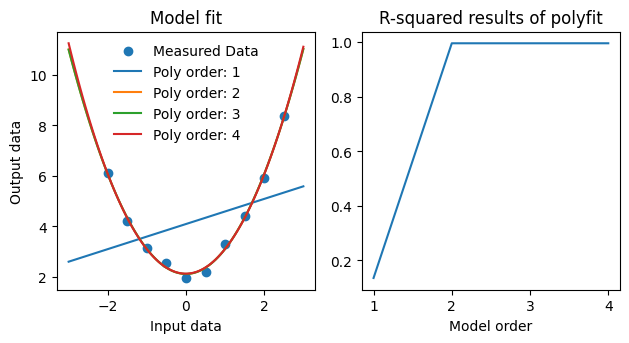

In [3]:
#@title Code
from sklearn.metrics import r2_score

test_order= [1, 2, 3, 4]
x_model = np.linspace(-3, 3, 100)
residuals = []

fig, ax = plt.subplots(ncols=2)

ax[0].scatter(x, y, label="Measured Data")

for p_order in test_order:
  test_model = np.poly1d(np.polyfit(x, y, p_order))
  y_model = test_model(x_model)
  ax[0].plot(x_model, y_model, label=f"Poly order: {p_order}")
  residuals.append(r2_score(y, test_model(x)))

ax[0].legend(frameon=False)
ax[0].set_xlabel("Input data")
ax[0].set_ylabel("Output data")
ax[0].title.set_text('Model fit')

ax[1].plot(test_order, residuals)
ax[1].title.set_text("R-squared results of polyfit")
ax[1].set_xlabel("Model order")

ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)

plt.tight_layout()

We see that polynomials of order > 1 all estimate the data pretty well, with R-squared values close to 1. However, given the nature of the data, it seems that using qubic or higher order of 2 seems like a waste. Is there a way to select models which fit the data well but is not too complicated?

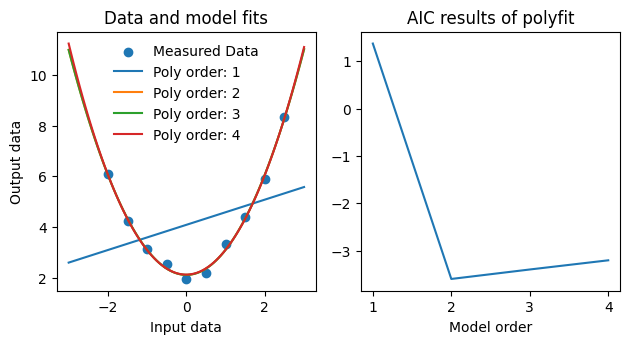

In [4]:
#@title Code
from sklearn.metrics import r2_score

test_order= [1, 2, 3, 4]
x_model = np.linspace(-3, 3, 100)
residuals = []

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x, y, label="Measured Data")

for p_order in test_order:
  test_model = np.poly1d(np.polyfit(x, y, p_order))
  y_model = test_model(x_model)
  ax[0].plot(x_model, y_model, label=f"Poly order: {p_order}")
  res = np.sum((y - test_model(x))**2)
  aic = np.log(res/len(x)) + 2*p_order/len(x)
  residuals.append(aic)

ax[0].legend(frameon=False)
ax[0].set_xlabel("Input data")
ax[0].set_ylabel("Output data")
ax[0].title.set_text('Data and model fits')

ax[1].plot(test_order, residuals)
ax[1].title.set_text("AIC results of polyfit")
ax[1].set_xlabel("Model order")

ax[0].set_box_aspect(1)
ax[1].set_box_aspect(1)
plt.tight_layout()
plt.show()


In this result we see that something called AIC (Akaike Information Criterion). This is a value which measures how well a model fits the data, but which penalizes too complex models. The derivation is based in information theory and the details is not important for this example. The formula for this quantity is:

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/fe67d436d9064a370cbe800b24b05ee8a68d491b)

Where k is the order of the model and L_hat is the maximum liklihood estiamtion of the data.

However, we see that this value correctly predicts that using a polynomial of order 2 is the best fit for this model.

Lets try what happens if we change the parameters of the data:

In [5]:
#@title Code
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from sklearn.metrics import r2_score

def regression_example(p1=0, p2=1, p3=0, p4=0, noise=0.2, x_min=-2, x_max=2, n_points=10, new_points=False):
  x = np.linspace(x_min, x_max, n_points)
  y = p1*x + p2*x**2 + p3*x**3 + p4*x**4 + np.random.randn(n_points)*noise
  test_order= [1, 2, 3, 4]
  x_model = np.linspace(x_min*1.2, x_max*1.2, n_points*5)
  residuals = []
  models = []

  fig, ax = plt.subplots(ncols=2, figsize=(10, 20))
  ax[0].scatter(x, y, label="Measured Data")

  for p_order in test_order:
    test_model = np.poly1d(np.polyfit(x, y, p_order))
    y_model = test_model(x_model)
    ax[0].plot(x_model, y_model, label=f"Poly order: {p_order}")
    res = np.sum((y - test_model(x))**2)
    aic = np.log(res/len(x)) + 2*p_order
    residuals.append(aic)
    models.append(test_model)

  if new_points:
    new_data_points = x = np.linspace(x_min*1.2, x_max*1.2, int(n_points/2))
    min_aic = min(residuals)
    ind_model = residuals.index(min_aic)
    best_model = models[ind_model]

    new_y = best_model(new_data_points)
    ax[0].scatter(new_data_points, new_y, label="New data for best model", marker='x')


  ax[0].legend(frameon=False,)
  ax[0].set_xlabel("Input data")
  ax[0].set_ylabel("Output data")
  ax[0].title.set_text('Data and model fits')

  ax[1].plot(test_order, residuals)
  ax[1].title.set_text("AIC results of polyfit")
  ax[1].set_xlabel("Model order")
  ax[1].set_xticks([1,2,3,4])

  ax[0].set_box_aspect(1)
  ax[1].set_box_aspect(1)
  plt.tight_layout()
  plt.show()

output = widgets.Output()
clear_output()

widgets.interact(regression_example, p1=widgets.FloatSlider(value=1, min=-10, max=10),
                 p2=widgets.FloatSlider(value=1, min=-10, max=10),
                 p3=widgets.FloatSlider(value=0, min=-10, max=10),
                 p4=widgets.FloatSlider(value=0, min=-10, max=10),
                 noise=widgets.FloatSlider(value=0.2, min=0, max=10),
                 x_min=widgets.FloatSlider(value=-2, min=-10, max=-0.1),
                 x_max=widgets.FloatSlider(value=2, min=0.1, max=10),
                 n_points=widgets.IntSlider(value=10, min=3, max=100),
                 new_points=widgets.Checkbox(
                 value=False,
                 description='Generate new data',
                 disabled=False))

display(output)



interactive(children=(FloatSlider(value=1.0, description='p1', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

Output()

One observation here is that the best AIC scoring order of the model and the order of the process which generated to the data is not always the same. This is reflected by the fact that less complex models are scored higher when there is high uncertainty in which model performs the best.

Well done! You have now done your first machine learning task. While simple, this is essentially what machine learning entails: acquring data, using the data to train a model, evaluate the model on the avaiable data and select the most appropriate model according to performance and complexity. When we have this model, that is, an estimate of the polynomial that generates the data, we can use it to generate new datapoints. This is essentially what generative AI is behind the curtain. But how do you generate an image from text? What is the model that is being fitted there? We're getting ahead of ourselves, but this is something worth considering.

There are some observations regarding the methodology shown in this example. Here, we have (correctly) assumed that the noisy data is generated using some type of polynomial function. If we know that the data is the result of a model which can be approximated using a polynomial, or some other analytical model, this approach is often the most robust and fastest way to fit a machine learning model to the data. It is however very uncommon that we are afforded this luxury, usually the relation between the data and the generating model is either completely unknown or only vaguely implied by the measurements. For these reasons a common approach is to not assume any model at all when fitting the data and fit a machine learning model which has no parametric correspondence to the process generating the training data. This is called parameter free machine learning, which provides a powerful methodology for training models on a large variety of data. This will be the approach going forward in this notebook.
